# Simulation to understand efficiency gain from dynamic workflow over regular workflow

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%load_ext nb_black

C:\Users\PSEN\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<IPython.core.display.Javascript object>

# Dynamic Workflow

# Assumptions:
### 1.Capacity of the staging area is 120 units
### 2.Total 5 employees
### 3.There will be three doors opened when the capcity reaches the celling
### 4.There will be one door opened when the capcity reaches the floor
### 5.We will be generating 1000 orders with random number of units between 200 and 800

# Assumtions

### 1. We are assuming random loader picker ratio to complete the work, assuming this is the ratio set by the supervisor
### 2.We will be generating 1000 orders with random number of units between 200 and 800

In [41]:
data = {
    "loading": [120, 110, 100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0],
    "picking": [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
    "Door": [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0],
    "loader": [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0],
    "picker": [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5],
}
df = pd.DataFrame(data)
df["Ratio"] = df["loader"].astype("str") + ":" + df["picker"].astype("str")
df["load_work"] = df["loading"] - df["loading"].shift(-1)
df["pick_work"] = df["picking"] - df["picking"].shift(1)
df["load_work"] = df["load_work"].fillna(0)
df["pick_work"] = df["pick_work"].fillna(0)
df["load_time"] = [
    5 * (df.load_work[i] / df.loader[i]) if df.load_work[i] > 0 else 0 for i in df.index
]
df["pick_time"] = [
    5 * (df.pick_work[i] / df.picker[i]) if df.pick_work[i] > 0 else 0 for i in df.index
]

load_time = sum(df.load_time)
pick_time = sum(df.pick_time)
# df


def time(df):
    load_time = sum(df.load_time)
    pick_time = sum(df.pick_time)
    units = sum(df.load_work)
    avg_loader = round(sum(df.loader) / len(df), 1)
    avg_picker = round(sum(df.picker) / len(df), 1)
    return {"load time": load_time, "pick time": pick_time, "unit": units}


time(df)

{'load time': 325.0, 'pick time': 201.66666666666666, 'unit': 120.0}

<IPython.core.display.Javascript object>

In [42]:
df

,loading,picking,Door,loader,picker,Ratio,load_work,pick_work,load_time,pick_time
0,120,0,3,3,2,3:2,10.0,0.0,16.666667,0.000000
1,110,10,3,3,2,3:2,10.0,10.0,16.666667,25.000000
2,100,20,3,3,2,3:2,10.0,10.0,16.666667,25.000000
3,90,30,2,2,3,2:3,10.0,10.0,25.000000,16.666667
4,80,40,2,2,3,2:3,10.0,10.0,25.000000,16.666667
5,70,50,2,2,3,2:3,10.0,10.0,25.000000,16.666667
6,60,60,2,2,3,2:3,10.0,10.0,25.000000,16.666667
7,50,70,2,2,3,2:3,10.0,10.0,25.000000,16.666667
8,40,80,2,2,3,2:3,10.0,10.0,25.000000,16.666667
9,30,90,2,2,3,2:3,10.0,10.0,25.000000,16.666667


<IPython.core.display.Javascript object>

In [43]:
time(df)

{'load time': 325.0, 'pick time': 201.66666666666666, 'unit': 120.0}

<IPython.core.display.Javascript object>

The Average PPH for dynamic workflow is : 13.76
The Standard deviation PPH for dynamic workflow is : 0.07


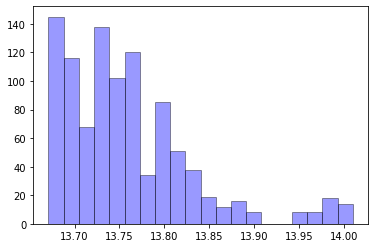

<IPython.core.display.Javascript object>

In [57]:
np.random.seed(seed=5)


pph_dynamic = []
pph_regular = []

staging_capacity = 120
#loop for calculating dynamic workflow
for i in range(1000):
    order = round(int(np.random.randint(200, 800, size=1)), -1)
    total_unit = 0
    total_time = 0

    while (order // 120) > (total_unit // 120):
        total_unit = total_unit + time(df)["unit"]
        total_time = total_time + time(df)["load time"] + time(df)["pick time"]
        # print(order,total_unit, total_time)

    pass
    for j in df.index:
        if (df.loading[j] == (order - total_unit)) & (df.loading[j] != 0):
            total_time = (
                total_time
                + (df["loading"][j] * 5 / df["loader"][0])
                + (df["loading"][j] * 5 / df["picker"][0])
            )

    eff = order / (total_time / 60)
    pph_dynamic.append(eff)

# Regular workflow
    loader = int(np.random.randint(1, 4, size=1))
    picker = 5 - loader
    load_time = ((staging_capacity) / loader) * 5
    pick_time = ((staging_capacity) / picker) * 5
    time_reg = load_time + pick_time
    total_reg = ((order) / 120) * time_reg
    pph_regular.append((order) / (total_reg / 60))


# average eff
print(
    "The Average PPH for dynamic workflow is :", "{:.2f}".format(np.mean(pph_dynamic))
)
print(
    "The Standard deviation PPH for dynamic workflow is :",
    "{:.2f}".format(np.std(pph_dynamic)),
)


sns.distplot(
    pph_dynamic, hist=True, kde=False, color="blue", hist_kws={"edgecolor": "black"}
)




The Average PPH for regular workflow is : 12.84
The Standard deviation PPH for regular workflow is : 2.25


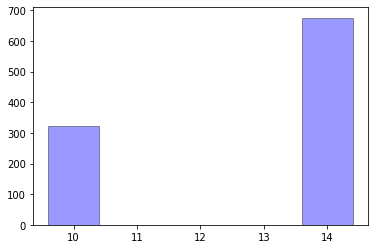

<IPython.core.display.Javascript object>

In [58]:
# average eff
print(
    "The Average PPH for regular workflow is :", "{:.2f}".format(np.mean(pph_regular))
)
print("The Standard deviation PPH for regular workflow is :","{:.2f}".format(np.std(pph_regular)))



sns.distplot(
    pph_regular, hist=True, kde=False, color="blue", hist_kws={"edgecolor": "black"})

